# 550 - Lab 2

<div class="alert alert-info" style="color:black">

### Submission Instructions 

The following questions are to be completed using `Altair` in Python.  If you are doing this assignment using R please refer to the `lab2-R.Rmd` file instead of this Python notebook. **Please note that two of your four assignments must be submitted using R and the other two must be submitted using Altair** (you choose which ones). Submit your completed assignment to Canvas, that is:
 
- upload a rendered <code>.html</code> version of your assignment
- and the source file (either a <code>.ipynb</code> or <code>.Rmd</code> file)
    
</div>

In [1]:
# Run this cell to ensure that altair plots show up in the exported HTML
# and that the R cell magic works
import altair as alt

# Save a vega-lite spec and a PNG blob for each plot in the notebook
alt.renderers.enable('default')
# Handle large data sets without embedding them in the notebook
alt.data_transformers.enable('data_server')

DataTransformerRegistry.enable('data_server')

# 0. Get motivated!

Let's suppose we would like to start our very own movie streaming service.  To set ourselves apart, this platform aims to show only the "best" movies. In this assignment, we will be aiming to understand the movie market: _which companies produces what kind of movies, and which receive good scores_. Then we can have a curated collection of movies on our platform which we'll call: Bestflix™.


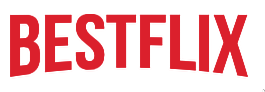

In this notebook, we will focus on Exploratory Data Analysis (EDA),
both for single numerical columns, pairwise numerical columns,
numerical columns conditioned on categorical columns and combinations of categorical columns. Let's get started!

# 1. Single numerical columns

<div class="alert alert-info" style="color:black">

### Question 1.1
rubric={reasoning:1,accuracy:1}

<p>In the beginning of EDA, it can be good to look at some textual summaries, just to get an idea of what to plot.  Download the file <code>lab2-movies.json</code> from Canvas, and read it in using pandas <code>read_json</code> function.  Using dataframe methods, do the following in three different cells:</p>
<ol>
<li>Display the first few and last few rows of the data.</li>
<li>Display info about all columns, data types, and number of NaN values.</li>
<li>Display a summary description of the data frame's numerical columns.</li>
</ol>
 
</div>

In [ ]:
# YOUR ANSWER GOES HERE

In [ ]:
# YOUR ANSWER GOES HERE

In [ ]:
# YOUR ANSWER GOES HERE

<div class="alert alert-info" style="color:black">

### Question 1.2
rubric={viz:2,accuracy:1,reasoning:1}
    
<ol type="1">
<li><p>Create a single histogram of a numerical column of your choice, choosing an appropriate number of bins and set the figure height to 100.</p>
<li><p>Create a kernel density estimate of the same numerical column from part 1.</p></li>
<li><p>Try setting the opacity to a float somewhere between 0 and 1 and chage the default colour your shaded density.</p></li>
<li><p>Compare the density plot with the corresponding histogram.  Do you think one gives a better understanding of the underlying data than the other? Which one and why?</p></li>
</ol>

</div>

In [ ]:
# YOUR ANSWER GOES HERE

<div class="alert alert-info" style="color:black">

### Question 1.3
rubric={viz:2,accuracy:2}
    
<ul>
    <li>Extract the column names from all numerical columns except <code>id</code> and save them to a variable as a list (the <code>.select_dtypes()</code> method can help here, or you can do it manually).</li>
<li>Copy the code from your histogram above and paste it here. Modify the code so it plots one histogram per numeric column in a plot grid with 2 columns and 3 rows. Don’t use a loop, use the Altair approach to repeating charts instead (with the <code>repeat</code> keyword rather than <code>row</code> or <codecolumn`).</li>
</ul>

</div>

In [ ]:
# YOUR ANSWER GOES HERE

# 2. Pairwise numerical columns

<div class="alert alert-info" style="color:black">

### Question 2.1
rubric={viz:2,accuracy:2}
    

<p>Next, let’s look at the relationships between pairs of numerical columns. For this we will create a scatterplot matrix (SPLOM) for all numerical columns except <code>id</code>.  I recommend starting with creating a single scatter plot and gradually substituting in the repeating columns</p>
<ol type="1">
<li>Do not include zero on either axis unless the data actually starts at zero.</li>
<li>Reduce each subplots height and width to be able to see the entire lower diagonal in view.</li>
<li>Set the opacity and size of the points directly inside <code>mark_point()</code> in order for the plots to appear less saturated.</li>
<li>Configure the axes to remove or shrink the font of the axes labels (and optional reduce the axes titles' size). Plots don't have to look perfect during EDA, the point here is to pick up trends, not necessarily to read all labels.</li>
</ol>

You can <a href=https://altair-viz.github.io/gallery/scatter_matrix.html> study this example if you want guidance.</a>

</div>

In [ ]:
# YOUR ANSWER GOES HERE

<div class="alert alert-warning" style="color:black">

### Question 2.2 (Bonus)
rubric={viz:0.5,accuracy:0.5}
    
<p><a href="https://r-coder.com/correlation-plot-r/">Correlation plots</a> provide another way of viewing the pairwise relationships between numerical columns (I realize the link I provided is for R but it provides a good overview of the types of variations).  </p>

<ol type="1">
<li>Using those examples as guides, create your own variation of a correlation plot.</li>
<li>Compare this to the plot you made with the SPLOM above. Which visualization do you prefer for the relationship between pairs of numeric columns? Briefly explain why in &lt;90 words.</li>
</ol> 

Hint:  Below is the calculation of the correlations between numeric variables to help you get started.
</div>

In [1]:
corr_df = movies[numeric_cols].corr("spearman").stack().reset_index(name='corr')

# YOUR ANSWER GOES HERE


In [4]:
# YOUR ANSWER GOES HERE

# 3. EDA of numerical columns conditioned on a categorical column (genres)

<div class="alert alert-info" style="color:black">

### Question 3.1
rubric={viz:1,accuracy:2}

<p>Lots of interesting variation in the histograms above! I wonder if some of it can be explained by genre or by which studio made the film ... This could be valuable information for Bestify™ so let’s find out!</p>
<p>We’ll start with the movie genres. If you look at the data frame, you can see that each film has multiple genres in a list. This is not ideal and means we must make a decision if we are counting the film once per genre or once overall. Since we have no information about which is the main genres, I suggest we go ahead and count it once per genre. In order to do this we need to replicate each row once per genre in the genres column. Luckily there is a pandas method called <code>explode</code> for exactly this. I have already done the necessary wrangling here, but please view the df so that you understand what happens and <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.explode.html">check out pandas doc for a simpler example</a>.</p>
<ol>
<li>Use this new dataframe and create multiple boxplots inside a single figure with genres on the y-axis and revenue on the x axis.</li>
<li>Boxplots can only be sorted by passing an explicit list in the sort column, in this case the genres. I want you to sort the genres by median revenue, so that the median lines of the box plot are nicely sorted. I have given you a skeleton below where you can fill in the blanks, but you are also free to do it your own way. In the en you need a list that you can pass to <code>sort</code> inside <code>alt.Y()</code>.</li>
<li> Remember that boxplots hide how many observations there are in each group. In order to determine how many movies went into the boxplots we just created, let’s make a barplot with the counts on the x-axis and the genres on the y-axis. Sort the bars by count such that the biggest bar closest to the x-axis.</li>
</ol>
<p>Once you have made the boxplot, you will see some interesting outliers. Remember that you can view what films these are by setting <code>tooltip='title'</code>, enjoy exploring!</p>
    
</div>

In [ ]:
# Uncomment and run these lines
# boom_genres = movies.explode('genres')
## Sorting by revenue because it is all about the money, money, money...
# genres_by_revenue = boom_genres.______('genres')['revenue'].______().___________().index._______()

# YOUR ANSWER GOES HERE 

<div class="alert alert-info" style="color:black">

### Question 3.2
rubric={viz:1,accuracy:2,reasoning:2}

<ol type="1">
<li>Copy the code from you boxplot above and use the same strategy as for the histograms to repeat this boxplot for all numerical values. Make sure to set the x-axis scale to not include 0 unless necessary, so that the <code>runtime</code> boxpot uses the available space well.  Ensure that categories are in the same order across all facets (so that we don't have to keep track of how they move around between subplots).</li>
<li>Study the boxplots you just created and reflect over what you see. Identify a research oriented question that you would be interested in exploring (this does not have to relate to Bestflix) and briefly motivate why you think this would be interesting (&lt;90 words). This is an open ended question because EDA is often open ended. And even when you go in with one particular hypotheses, you must stay open to what the data tells you and be able to detect interesting relationships that you did not foresee ahead of time.</li>
</ol>
 
</div>

<div class="alert alert-danger" style="color:black">

Since violin plots are not supported by Altair yet, <b> ALL students are expected to complete the following questions (as indicated using red boxes) in R. </b>  If you are choosing to do the remaining questions in Python, you can either create a separate Rmd/html file and upload thoes in addition to these Python notebook files or create an R cell in this notebook using <a href="https://rpy.sourceforge.io/rpy2.html">rpy2</a> package (formally "R magic"); see lab 1 for an example of this or <a href="https://anderfernandez.com/en/blog/how-to-program-with-python-and-r-in-the-same-jupyter-notebook/">How to program with Python and R in the same Jupyter notebook</a>. Tip: As described in the latter, you can "send" the data frame you've created in Python above to R rather than having to redo the wrangling. 

    
## Question 3.3
rubric={viz:1,accuracy:2}
    
<h4>R only</h4>        
<ol type="1">
<li>Use this new dataframe and create multiple violinplots inside a single figure by having genres on the y-axis and revenue on the x axis.</li>
<li>Read the documentation of the violin plot to find out how you can use its parameters to add a line for the median (hint: the same as quantile 0.5).</li>
<li>We need to create a new column for sorting using <code>mutate()</code>. I want you to sort the genres by median revenue, so that the median lines of the violin plots are nicely sorted. I have given you a skeleton below where you can fill in the blanks, but you are also free to do it your own way. Then sort by this new column (I will post an example on how to do this on Canvas if we don't have time for it in lecture).</li>
</ol>
    

</div>

<div class="alert alert-danger" style="color:black">
    
## Question 3.4 
rubric={viz:1,accuracy:2}
    
<h4>R only</h4>        
<ol type="1">
<li>Copy the code from your violin plot above and use the same faceting strategy as for the histograms to repeat this violin plot for all numerical values. Sort the violin plots by median revenue.
<ul>
<li>In contrast to the histograms, you will here need to save the genres and medium_income columns by using the <code>!</code> syntax in your call to <code>pivot_longer</code>, see the <a href="https://tidyr.tidyverse.org/reference/pivot_longer.html">example in the manual for how to do this</a>.</li>
<li>You will also need to define both x and y in your <code>aes()</code>, just like in the single violinplot you made above.</li>
</ul></li>
</ol>
    

</div>

<div class="alert alert-danger" style="color:black">
    
## Question 3.5 (Bonus)
rubric={viz:0.5,accuracy:0.5}
    
<h4>R only</h4>    
<ol type="1">
<li> Upon reading the <a href="https://ggplot2.tidyverse.org/reference/geom_violin.html">documentation of the violin plot</a> you will notice there exists an argument for scaling the area of the violin plots according to the number of observations. Copy and edit the code from the faceted violin plots above such that large violins correspond to large sample sizes. </li>
<li> 
Compare this visualization to the boxplot and barplot we created in 3.1.  Which approach do you think is clearer for getting a feeling for the number of observation in each group and why?
</li>
</ol>
    

</div>

</div>


<div class="alert alert-secondary" style="color:black">


<b>THIS QUESTION WILL NOT BE GRADED FOR MARKS</b> 
    
For  optional practice, investigate how the numerical columns  vary between production studios! Some example questions are provided below to guide you, but feel free to get creative and answer your own data-driven questions!
 
<p>Let’s see how the numerical columns vary with different production studios.</p>
<ol type="1">
<li>Create a new dataframe from exploding/unnesting the <code>studios</code> column in the <code>movies</code> dataframe. You can use my code from above to guide you.</li>
<li>Create a similar sorting list as before, but this time with the studies sorted by median revenue.</li>
<li>Create the same repeated boxplots for the studios. A tip when you are creating similar plots for two different sections of your notebook, is to use a different color for each so that it is easy to orient yourself (unless you are encoding color as a visual aesthetic of course, but we’re not doing that here). Pick any HTML color either via its hex code or by choosing a name from <a href="https://stackoverflow.com/a/37232759/2166823">this list of named colors</a>. Color all the bars and boxes in this color by setting it inside <code>mark_boxplot()</code> / <code>geom_boxplot()</code>.</li>
<li>Create the same barplot of counts as above for the studios. Color the bars in the same colors as the boxplots.</li>
<li>Reflect on the information in the boxplot and / or the barplot. Identify two interesting relationships / questions / discoveries that stand out to you and that you would want to explore further. Briefly motivate why (&lt;90 words).</li>
</ol>



In [2]:
# YOUR ANSWER GOES HERE

# 4. EDA of categorical columns

<div class="alert alert-info" style="color:black">

### Question 4.1
rubric={viz:1,accuracy:1,reasoning:1}
    
<h4>Python</h4>
<p>As the final step of our EDA, let’s evaluate if studios preferentially produce some movie genres over others.</p>
<ol type="1">
<li>Explode both the <code>'studio'</code> and the <code>'genres'</code> columns via method chaining. We need both since we will be counting the number of observations in each studio/genre combination.</li>
<li>Encode the x and y axis with the genres and studios, respectively. Map the count to color and size and plot with a mark of your choice.</li>
<li>In a new cell, switch to use <code>mark_rect()</code> and encode only color as the count.</li>
<li>Which of the plots in 2 and 3 do you think gives you the clearest understanding of how the distribution of genres within each studio? Justify your answer.</li>
</ol>

</div>

In [ ]:
# YOUR ANSWER GOES HERE

<div class="alert alert-warning" style="color:black">

### Question 4.2 (Bonus)
rubric={accuracy:1}

<p>
The plots above are great for comparing absolute counts,
but that means that studios with smaller production volume gets drowned out.
Let's instead visualize the proportion within each studio for each genre.
Calculate the <em>proportion</em> for each studio - genre pair,
so that for each studio, the genre proportions adds up to 1.
Visualize with your favorite categorical count plot.
</p>
</div>

In [ ]:
# YOUR ANSWER GOES HERE

Excellent work!! We're proud of your efforts to get Bestflix off the ground
and will be in contact when we launch our next project: Bestify.

---

# Submission to Canvas

When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Run All Cells...`
2. Convert your notebook to .html format using the `convert_notebook()` function below or by `File -> Export Notebook As... -> Export Notebook to HTML`
3. Submit your source file(s) and rendered HTML document to Canvas before the deadline.